## Info

Using the loan data set found at ... I need to refind this.

We will perform data analysis and modeling with the focus on predicting loan approval (Loan Status = Y/N) in a binary classification.

In [1]:
import pandas as pd
import sidetable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import gc

pd.set_option('max_columns',150)
pd.set_option('max_rows',150)

### Read in the data...

In [75]:
df = pd.read_csv('data/loan_data_set.csv')
print(df.shape)
df.head()

(614, 13)


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**13 features mostly objects**

### Define the target...

In [77]:
df.stb.freq(["Loan_Status"])

Loan_Status  count    percent  cumulative_count  cumulative_percent
0           Y    422  68.729642               422           68.729642
1           N    192  31.270358               614          100.000000

In [78]:
## binarize the target
df['LoanApproved'] = np.where(df.Loan_Status == 'Y',1,0)
print(df.LoanApproved.value_counts(),'\n', df.Loan_Status.value_counts())

1    422
0    192
Name: LoanApproved, dtype: int64 
 Y    422
N    192
Name: Loan_Status, dtype: int64


**matchy matchy**

### Examine the remaining feature space...

In [79]:
for c in df.columns:
    print(c, "="*42)
    tmp = df[c].value_counts(dropna=False)
    print(tmp.head(10))

Loan_ID ==========================================
LP002055    1
LP001940    1
LP001005    1
LP001888    1
LP002100    1
LP001953    1
LP001699    1
LP002560    1
LP001926    1
LP002225    1
Name: Loan_ID, dtype: int64
Gender ==========================================
Male      489
Female    112
NaN        13
Name: Gender, dtype: int64
Married ==========================================
Yes    398
No     213
NaN      3
Name: Married, dtype: int64
Dependents ==========================================
0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64
Education ==========================================
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed ==========================================
No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64
ApplicantIncome ==========================================
2500    9
4583    6
2600    6
6000    6
5000    5
4166    5
3333    5
3750    5
2400    4
8333    4
Name

**As far as data sets go this is rather simple and very clean.**

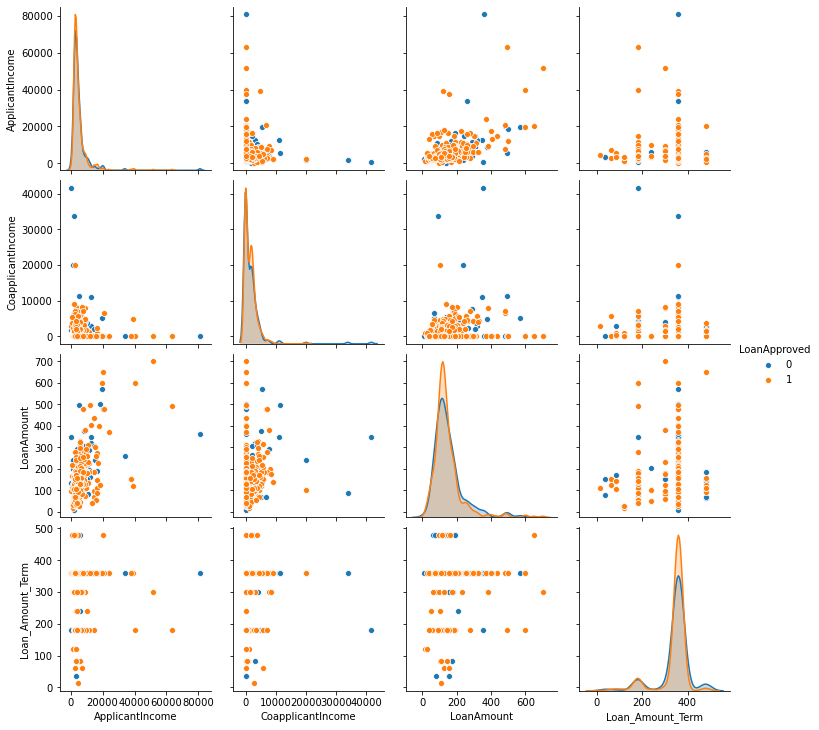

In [80]:
sns.pairplot(data=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','LoanApproved']],
             hue = 'LoanApproved');

**Mostly right skewed and normal(ish)**

In [81]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','LoanApproved']].corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
LoanApproved             -0.004710          -0.059187   -0.037318   

                   Loan_Amount_Term  LoanApproved  
ApplicantIncome           -0.045306     -0.004710  
CoapplicantIncome         -0.059878     -0.059187  
LoanAmount                 0.039447     -0.037318  
Loan_Amount_Term           1.000000     -0.021268  
LoanApproved              -0.021268      1.000000

### Feature Creation from the above...

In [82]:
df['LoanAmount_to_Term'] = df.LoanAmount / df.Loan_Amount_Term
df['ApplicantIncome_w_CoAppIncome'] = df.ApplicantIncome + df.CoapplicantIncome
df['ApplicantInc_to_LoanAmount'] = df.ApplicantIncome / df.LoanAmount
df['CombinedInc_to_LoanAmount'] = df.ApplicantIncome_w_CoAppIncome / df.LoanAmount

In [83]:
df[['LoanAmount_to_Term','ApplicantIncome_w_CoAppIncome','ApplicantInc_to_LoanAmount',
    'CombinedInc_to_LoanAmount','LoanApproved']].corr()

LoanAmount_to_Term  \
LoanAmount_to_Term                       1.000000   
ApplicantIncome_w_CoAppIncome            0.367083   
ApplicantInc_to_LoanAmount              -0.045189   
CombinedInc_to_LoanAmount               -0.038368   
LoanApproved                            -0.015394   

                               ApplicantIncome_w_CoAppIncome  \
LoanAmount_to_Term                                  0.367083   
ApplicantIncome_w_CoAppIncome                       1.000000   
ApplicantInc_to_LoanAmount                          0.417379   
CombinedInc_to_LoanAmount                           0.510116   
LoanApproved                                       -0.031271   

                               ApplicantInc_to_LoanAmount  \
LoanAmount_to_Term                              -0.045189   
ApplicantIncome_w_CoAppIncome                    0.417379   
ApplicantInc_to_LoanAmount                       1.000000   
CombinedInc_to_LoanAmount                        0.824780   
LoanApproved                                     0.037087   

                               CombinedInc_to_LoanAmount  LoanApproved  
LoanAmount_to_Term                             -0.038368     -0.015394  
ApplicantIncome_w_CoAppIncome                   0.510116     -0.031271  
ApplicantInc_to_LoanAmount                      0.824780      0.037087  
CombinedInc_to_LoanAmount                       1.000000      0.024234  
LoanApproved                                    0.024234      1.000000

### Set an Index...

In [84]:
df.Loan_ID.nunique(), len(df)

(614, 614)

**No repeats**

In [85]:
df.set_index('Loan_ID', inplace=True)

In [86]:
df.head(3)

Gender Married Dependents Education Self_Employed  ApplicantIncome  \
Loan_ID                                                                       
LP001002   Male      No          0  Graduate            No             5849   
LP001003   Male     Yes          1  Graduate            No             4583   
LP001005   Male     Yes          0  Graduate           Yes             3000   

          CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
Loan_ID                                                                     
LP001002                0.0         NaN             360.0             1.0   
LP001003             1508.0       128.0             360.0             1.0   
LP001005                0.0        66.0             360.0             1.0   

         Property_Area Loan_Status  LoanApproved  LoanAmount_to_Term  \
Loan_ID                                                                
LP001002         Urban           Y             1                 NaN   
LP001003         Rural           N             0            0.355556   
LP001005         Urban           Y             1            0.183333   

          ApplicantIncome_w_CoAppIncome  ApplicantInc_to_LoanAmount  \
Loan_ID                                                               
LP001002                         5849.0                         NaN   
LP001003                         6091.0                   35.804688   
LP001005                         3000.0                   45.454545   

          CombinedInc_to_LoanAmount  
Loan_ID                              
LP001002                        NaN  
LP001003                  47.585938  
LP001005                  45.454545

### Outlier Replacement

Examine outliers and replace if necessary.

In [87]:
def outlier_replacement(df, labels=None, sigma=2, verbose=True) -> pd.DataFrame:
    '''Checks for outliers based on supplied sigma in label columns.
        If median < mean replaces with mean. 
        If median >= mean replaces with median.
        Specific towards right skewed data.
    '''
    tmp = df.copy()
    len_df = len(tmp)
    if labels is None:
        repls = tmp.columns
    else:
        repls = labels
    for c in tmp[repls].columns:
        avg = tmp[c].mean()
        med = tmp[c].median()
        if med < avg:
            chg = avg
        else: 
            chg = med
        upr = avg+sigma*tmp[c].std()
        lwr = avg-sigma*tmp[c].std()
        lwr_cnt = tmp[tmp[c] < lwr][c].count()
        upr_cnt = tmp[tmp[c] > upr][c].count()
        tmp[c] = np.where((tmp[c] < lwr) | (tmp[c] > upr), chg, tmp[c])

        if verbose:
            print(c, f"lower = {lwr :.3f},  mean = {avg :.3f}, upper = {upr :.3f},  med = {med :.3f}")
            print(f"\t lower pct = {lwr_cnt/len_df*100 :.3f}%,  upper pct = {upr_cnt/len_df*100 :.3f}%")
    return tmp

In [90]:
labels = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
          'LoanAmount_to_Term','ApplicantIncome_w_CoAppIncome','ApplicantInc_to_LoanAmount',
          'CombinedInc_to_LoanAmount']

df2 = outlier_replacement(df, labels=labels, sigma=2, verbose=True)

ApplicantIncome lower = -6814.624,  mean = 5403.459, upper = 17621.543,  med = 3812.500
	 lower pct = 0.000%,  upper pct = 2.606%
CoapplicantIncome lower = -4231.251,  mean = 1621.246, upper = 7473.743,  med = 1188.500
	 lower pct = 0.000%,  upper pct = 1.792%
LoanAmount lower = -24.762,  mean = 146.412, upper = 317.587,  med = 128.000
	 lower pct = 0.000%,  upper pct = 3.909%
Loan_Amount_Term lower = 211.759,  mean = 342.000, upper = 472.241,  med = 360.000
	 lower pct = 9.121%,  upper pct = 2.443%
LoanAmount_to_Term lower = -0.571,  mean = 0.480, upper = 1.531,  med = 0.365
	 lower pct = 0.000%,  upper pct = 2.280%
ApplicantIncome_w_CoAppIncome lower = -5892.623,  mean = 7024.705, upper = 19942.033,  med = 5416.500
	 lower pct = 0.000%,  upper pct = 2.932%
ApplicantInc_to_LoanAmount lower = -29.343,  mean = 39.378, upper = 108.099,  med = 32.399
	 lower pct = 0.000%,  upper pct = 3.257%
CombinedInc_to_LoanAmount lower = -24.607,  mean = 51.226, upper = 127.059,  med = 41.427
	 lower 

### Impute Missing Values

We will impute using most common value or mean based on distribution of target.

In [91]:
def imputer(x, target_col) -> pd.DataFrame:
    '''imputes using most common value or mean over target dist'''
    obj = x.drop(target_col, axis=1).select_dtypes(include='object').columns
    non = x.drop(target_col, axis=1).select_dtypes(exclude='object').columns
    
    for c in obj:
        x[c] = x.groupby(target_col)[c].transform(lambda l: l.fillna(x[c].mode()[0])) #.value_counts().iloc[0]))
        
    for c in non:
        x[c] = x.groupby(target_col)[c].transform(lambda l: l.fillna(x[c].mean()))
        
    return x

In [92]:
df3 = imputer(df2, 'LoanApproved')

In [93]:
df3.isnull().sum()

Gender                           0
Married                          0
Dependents                       0
Education                        0
Self_Employed                    0
ApplicantIncome                  0
CoapplicantIncome                0
LoanAmount                       0
Loan_Amount_Term                 0
Credit_History                   0
Property_Area                    0
Loan_Status                      0
LoanApproved                     0
LoanAmount_to_Term               0
ApplicantIncome_w_CoAppIncome    0
ApplicantInc_to_LoanAmount       0
CombinedInc_to_LoanAmount        0
dtype: int64

### Dummying

In [94]:
def dummy_cols(x, target_col) -> pd.DataFrame:
    '''dummies object columns'''
    obj = x.drop(target_col, axis=1).select_dtypes(include='object').columns
    for c in obj:
        tmp = x[c].value_counts(dropna=False)
        if len(tmp) <= 2:
            name = tmp.index[0]
            x[c+'_'+name] = np.where(x[c] == name, 1, 0)
            
        else:
            dum = pd.get_dummies(x[c])
            dum.columns = [c+'_'+d for d in dum.columns]
            x = pd.concat([x, dum], axis=1)
            
    return x.drop(obj, axis=1)

In [95]:
df4 = dummy_cols(df3, 'LoanApproved')

In [96]:
df4.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002           5849.0                0.0  133.866371             360.0   
LP001003           4583.0             1508.0  128.000000             360.0   
LP001005           3000.0                0.0   66.000000             360.0   
LP001006           2583.0             2358.0  120.000000             360.0   
LP001008           6000.0                0.0  141.000000             360.0   

          Credit_History  LoanApproved  LoanAmount_to_Term  \
Loan_ID                                                      
LP001002             1.0             1            0.423872   
LP001003             1.0             0            0.355556   
LP001005             1.0             1            0.183333   
LP001006             1.0             1            0.333333   
LP001008             1.0             1            0.391667   

          ApplicantIncome_w_CoAppIncome  ApplicantInc_to_LoanAmount  \
Loan_ID                                                               
LP001002                         5849.0                   34.309524   
LP001003                         6091.0                   35.804688   
LP001005                         3000.0                   45.454545   
LP001006                         4941.0                   21.525000   
LP001008                         6000.0                   42.553191   

          CombinedInc_to_LoanAmount  Gender_Male  Married_Yes  Dependents_0  \
Loan_ID                                                                       
LP001002                  45.431775            1            0             1   
LP001003                  47.585938            1            1             0   
LP001005                  45.454545            1            1             1   
LP001006                  41.175000            1            1             1   
LP001008                  42.553191            1            0             1   

          Dependents_1  Dependents_2  Dependents_3+  Education_Graduate  \
Loan_ID                                                                   
LP001002             0             0              0                   1   
LP001003             1             0              0                   1   
LP001005             0             0              0                   1   
LP001006             0             0              0                   0   
LP001008             0             0              0                   1   

          Self_Employed_No  Property_Area_Rural  Property_Area_Semiurban  \
Loan_ID                                                                    
LP001002                 1                    0                        0   
LP001003                 1                    1                        0   
LP001005                 0                    0                        0   
LP001006                 1                    0                        0   
LP001008                 1                    0                        0   

          Property_Area_Urban  Loan_Status_Y  
Loan_ID                                       
LP001002                    1              1  
LP001003                    0              0  
LP001005                    1              1  
LP001006                    1              1  
LP001008                    1              1

### Drop Remaining Unused Features...

In [97]:
drops = ['Loan_Status_Y']
df4 = df4.drop(drops, axis=1)

## Modeling and Cross Val

At this point we are comfortable with the data as it is and we can move forward with potential modeling.

In [98]:
df4.stb.freq(['LoanApproved'])

LoanApproved  count    percent  cumulative_count  cumulative_percent
0             1    422  68.729642               422           68.729642
1             0    192  31.270358               614          100.000000

**At a ~ 70/30 split we arent going to try any significant rebalancing.**

In [99]:
import shap
from sklearn.metrics import classification_report, roc_auc_score, f1_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.utils.class_weight import compute_class_weight

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [100]:
target = 'LoanApproved'

train, test = train_test_split(df4, test_size=0.3, random_state=123)
print(train.shape, test.shape)

(429, 21) (185, 21)


**Grid Search**

In [101]:
sfk = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
y = train[target]
X = train.drop(target, axis=1) 
print(X.shape, y.shape)

param_grid = {"max_depth": [3,6,9,12,15],
              "min_samples_split": [2,5,7,10],
              "min_samples_leaf": [1,2,5],
              'criterion':['gini','entropy'], 
              'splitter':['best','random'], 
              'class_weight':['balanced'],}

gs_mod = DecisionTreeClassifier()
grids = HalvingRandomSearchCV(gs_mod, param_grid, scoring='f1', 
                              cv=sfk, random_state=123, n_jobs=-1)

grids.fit(X, y)
print(grids.best_params_, grids.best_score_)

(429, 20) (429,)
{'splitter': 'best', 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 6, 'criterion': 'entropy', 'class_weight': 'balanced'} 0.8391016875331359


In [102]:
pg = grids.best_params_
print(pg)

mod = DecisionTreeClassifier(**pg)
scores = cross_validate(mod, X, y, scoring=['f1'], cv=sfk, 
                        n_jobs=-1, return_estimator=True, return_train_score=True)

{'splitter': 'best', 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 6, 'criterion': 'entropy', 'class_weight': 'balanced'}


In [103]:
print(f"Train F1 Scores = {scores['train_f1']}")
print('\n')
print(f"Test F1 Scores = {scores['test_f1']}")

Train F1 Scores = [0.90598291 0.9035533  0.86907021 0.90971039 0.90401396 0.88454707
 0.90586146 0.88454707 0.86891386 0.91032149]


Test F1 Scores = [0.95384615 0.875      0.77192982 0.86567164 0.8125     0.86666667
 0.79365079 0.91803279 0.80645161 0.87878788]


In [104]:
bestcv = np.argmax(np.array(scores['test_f1']))
print(bestcv)
bestM = scores['estimator'][bestcv]

dtest = test.drop(target, axis=1)
tpred = bestM.predict(dtest)
tprob = bestM.predict_proba(dtest)

print(classification_report(test[target], tpred))

0
              precision    recall  f1-score   support

           0       0.85      0.44      0.58        64
           1       0.76      0.96      0.85       121

    accuracy                           0.78       185
   macro avg       0.81      0.70      0.71       185
weighted avg       0.79      0.78      0.76       185



**The model does well with recall but incorrectly predicts some on precision (False Positives).**

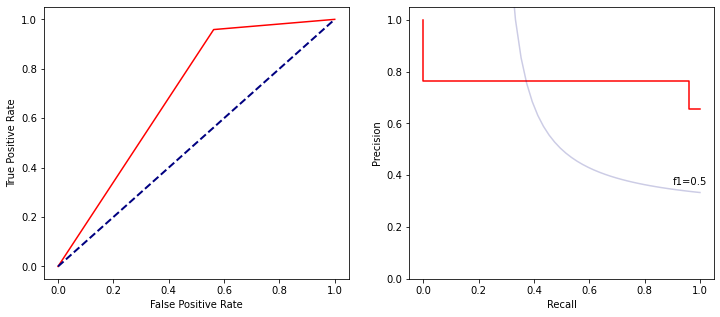

In [105]:
fig, ax=plt.subplots(1,2,figsize=(12,5))
fpr, tpr, _ = roc_curve(test[target], tpred, pos_label=bestM.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax[0], color='r')
ax[0].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")

prec, recall, _ = precision_recall_curve(test[target], tpred, pos_label=bestM.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=ax[1], color='r')
f_scores = [0.5]
for f_score in f_scores:
    xf = np.linspace(0.01, 1)
    yf = f_score * xf / (2 * xf - f_score)
    (l,) = ax[1].plot(xf[yf >= 0], yf[yf >= 0], color="navy", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, yf[45] + 0.02))
ax[1].set_ylim([0.0, 1.05]);

### Examining Calibration...

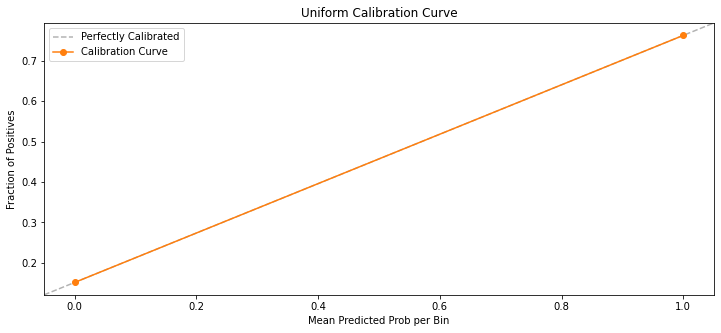

In [106]:
test_probs = bestM.predict_proba(dtest)[:,1]
ctrue, cpred = calibration_curve(test[target], tpred, n_bins=10, strategy='uniform')
## the bins match with deciling

fig, ax=plt.subplots(1,1,figsize=(12,5))
ax.plot([0, 1], [0, 1], color='k', ls='--', alpha=0.3, transform=ax.transAxes)
ax.plot(cpred, ctrue, color='C1', linestyle='solid', marker='o') 
ax.set_ylabel('Fraction of Positives')
ax.set_xlabel('Mean Predicted Prob per Bin')
ax.legend(['Perfectly Calibrated','Calibration Curve'])
ax.set_title("Uniform Calibration Curve");

**Thats spot on...**

### SHAP examination...

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


[0.5 0.5]


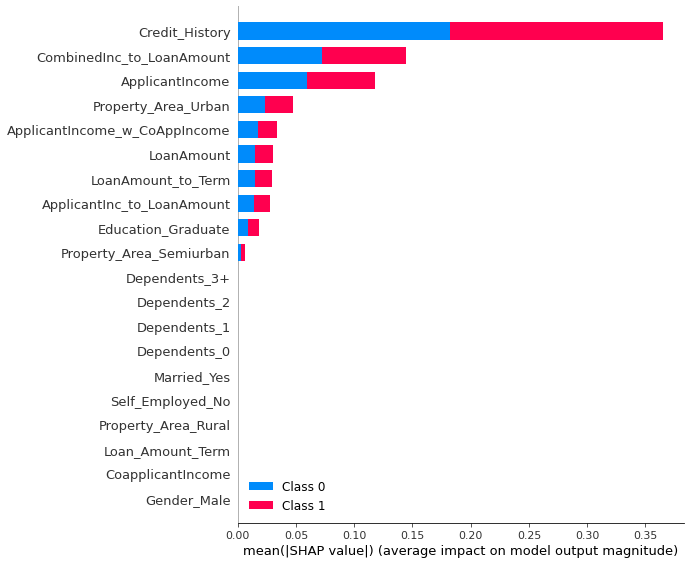

In [107]:
explainer = shap.TreeExplainer(bestM) #grids.best_estimator_)
shap_values = explainer.shap_values(X)
print(explainer.expected_value)
shap.summary_plot(shap_values, X)

(429, 21) (429, 21)
4


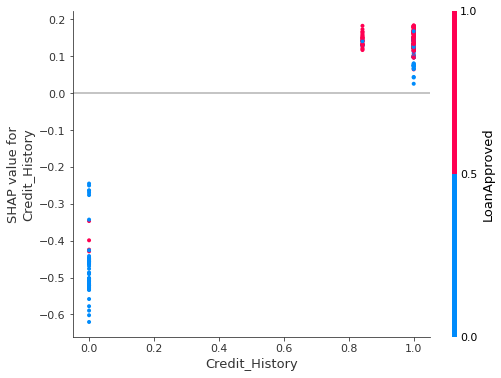

8


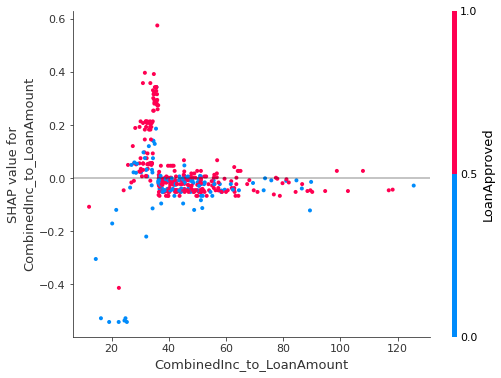

0


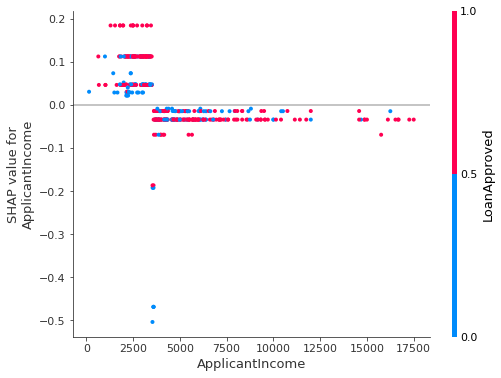

19


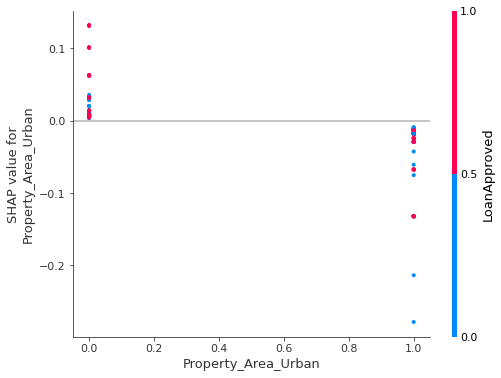

6


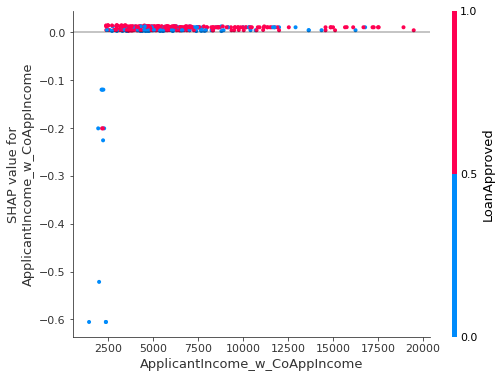

2


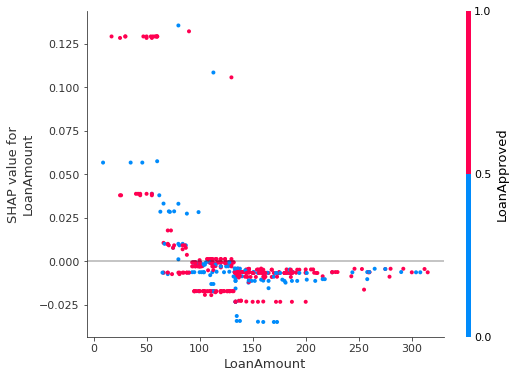

5


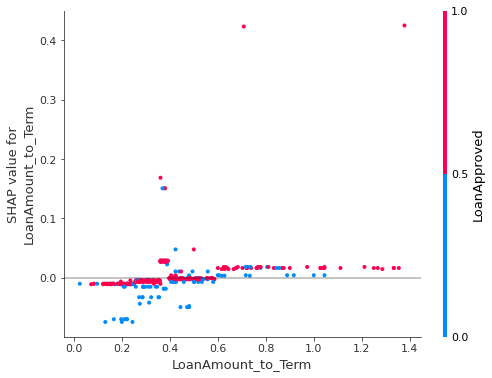

7


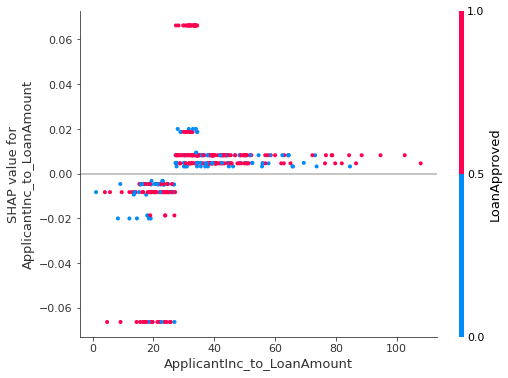

15


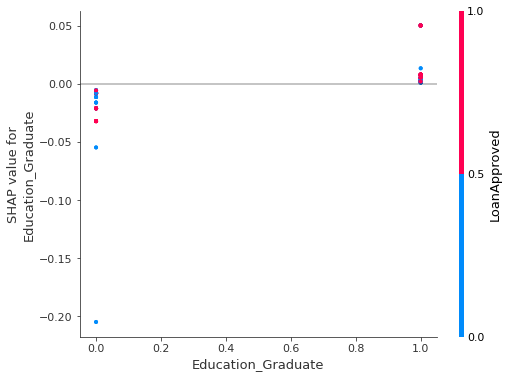

18


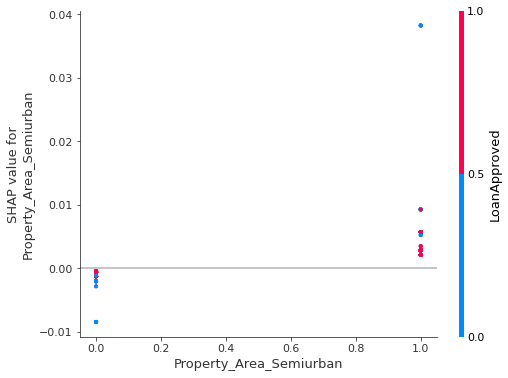

3


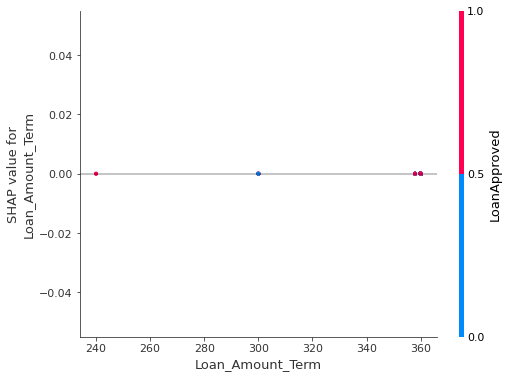

In [108]:
vals = np.abs(shap_values[1]).mean(0)
feature_importance = pd.DataFrame(list(zip(X.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)

svp = np.hstack([shap_values[1], np.zeros((len(shap_values[1]), 1))])
xcy = pd.concat([X, y], axis=1)

print(svp.shape, xcy.shape)

for ci in feature_importance.head(11).index:
    print(ci)
    fig, ax=plt.subplots(1,1,figsize=(8,6))
    ax.axhline(0, c='k', alpha=0.3);
    shap.dependence_plot(ci, svp, xcy, interaction_index="LoanApproved", ax=ax)

### Notes

- Better credit history leads to more approvals.
- When combined Income to Loan Amount Ratio is < 70 it is more likely to approve.
- When the applicants income is higher it is less likely to approve, which seems counterintutive.
- More like if the property area is NOT urban.
- Coapplicant income drives the likelihood of approval up.
- Better when the loan amount is less than 125.
- If the Loan Amount to Term is above 0.3 it is more likely to approve which may be better for the lender.
